In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [ ]:
#Loading dataset
data = pd.read_csv('/content/watermelon_data.csv')
#data = data.drop(columns = 'Num')
data.head()

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,Green,rolled up,turbid,clear,sunken,slippery,0.697,0.460,Yes
1,2,Dark,rolled up,low,clear,sunken,slippery,0.774,0.386,Yes
2,3,Dark,rolled up,turbid,clear,sunken,slippery,0.634,0.264,No
3,4,Green,rolled up,low,clear,sunken,slippery,0.608,0.318,Yes
4,5,light,rolled up,turbid,clear,sunken,slippery,0.556,0.215,Yes


In [ ]:
data.info()

print("Column items in the dataset:")
print(data.columns.values)

print("Categorical columns:")
cat_cols = data.select_dtypes(include = 'object').columns.values
print(cat_cols)

print("Numerical columns:")
numeric_cols = data.select_dtypes(include = np.number).columns.values
print(numeric_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Num           209 non-null    int64  
 1   Color         209 non-null    object 
 2   Root          209 non-null    object 
 3   Sound         209 non-null    object 
 4   Texture       209 non-null    object 
 5   Belly_button  209 non-null    object 
 6   Touch         209 non-null    object 
 7   Density       209 non-null    float64
 8   sugar_rate    209 non-null    float64
 9   GB            209 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 16.5+ KB
Column items in the dataset:
['Num' 'Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'Density'
 'sugar_rate' 'GB']
Categorical columns:
['Color' 'Root' 'Sound' 'Texture' 'Belly_button' 'Touch' 'GB']
Numerical columns:
['Num' 'Density' 'sugar_rate']


In [ ]:
#Import label encoder
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
data['Color']= label_encoder.fit_transform(data['Color'])
data['Root']=label_encoder.fit_transform(data['Root'])
data['Sound']=label_encoder.fit_transform(data['Sound'])
data['Texture']=label_encoder.fit_transform(data['Texture'])
data['Touch']=label_encoder.fit_transform(data['Touch'])
data['Belly_button']=label_encoder.fit_transform(data['Belly_button'])
data['GB'] = label_encoder.fit_transform(data['GB'])

data

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
0,1,1,1,2,1,2,0,0.697,0.460,1
1,2,0,1,1,1,2,0,0.774,0.386,1
2,3,0,1,2,1,2,0,0.634,0.264,0
3,4,1,1,1,1,2,0,0.608,0.318,1
4,5,2,1,2,1,2,0,0.556,0.215,1
...,...,...,...,...,...,...,...,...,...,...
204,214,0,1,2,1,2,0,0.635,0.271,1
205,215,0,0,1,0,0,0,0.666,0.089,0
206,216,1,2,0,1,1,1,0.244,0.268,0
207,217,2,2,0,2,1,0,0.245,0.058,0


In [ ]:
data.corr().sort_values(by = 'GB', ascending= False)

,Num,Color,Root,Sound,Texture,Belly_button,Touch,Density,sugar_rate,GB
GB,-0.169716,-0.217918,-0.028115,0.299536,0.040850,0.355830,-0.167072,0.294923,0.439691,1.000000
sugar_rate,-0.017880,-0.472871,-0.053219,0.196644,-0.063852,0.334799,0.171507,0.159320,1.000000,0.439691
Belly_button,0.063112,0.260851,0.174617,0.063818,0.043171,1.000000,-0.444588,0.371337,0.334799,0.355830
Sound,-0.094284,-0.193492,-0.575758,1.000000,-0.005738,0.063818,0.042421,0.302486,0.196644,0.299536
Density,0.036008,-0.219253,-0.380027,0.302486,-0.524352,0.371337,-0.689016,1.000000,0.159320,0.294923
Texture,0.013344,0.359867,0.607026,-0.005738,1.000000,0.043171,0.190866,-0.524352,-0.063852,0.040850
Root,0.077841,0.336450,1.000000,-0.575758,0.607026,0.174617,0.010987,-0.380027,-0.053219,-0.028115
Touch,-0.047968,-0.123898,0.010987,0.042421,0.190866,-0.444588,1.000000,-0.689016,0.171507,-0.167072
Num,1.000000,0.044127,0.077841,-0.094284,0.013344,0.063112,-0.047968,0.036008,-0.017880,-0.169716
Color,0.044127,1.000000,0.336450,-0.193492,0.359867,0.260851,-0.123898,-0.219253,-0.472871,-0.217918


If we were to use 0.1 as the threshold, we noticed that all the predictors are correlated with the outcome 'GB', except for 'Texture' and 'Root'. However, 0.1 is not significant enough for us to conclude the correlation. If we were to elevate our threshold to 0.3, we will noticed that only 'Belly_button' and 'sugar_rate' meets the threshold, we might not have a sufficient number of predictos to predict the dataset if we use such threshold. As the highest correlation is 0.439, we decide to use a threshold of 0.25 as the mid point that helps us to determinine which predictors are going to be sufficient to use as good predictors.

In [ ]:
import statsmodels.formula.api as smf

logistic1 = smf.logit(formula= 'GB ~ Belly_button + sugar_rate', data= data)
fitted = logistic1.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.532341
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     GB   No. Observations:                  209
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.1972
Time:                        04:53:23   Log-Likelihood:                -111.26
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 1.361e-12
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8927      0.426     -6.788      0.000      -3.728      -2.058
Belly_button     0.6816      0.198      3.437      0.001       0.293       1.070
sugar_rate       7.0495      1.455      4.844      0.000       4.197       9.902
================================================================================
"""

In [ ]:
import statsmodels.formula.api as smf

logistic1 = smf.logit(formula= 'GB ~ Belly_button + sugar_rate + Sound + Density', data= data)
fitted = logistic1.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.489081
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     GB   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.2624
Time:                        04:53:53   Log-Likelihood:                -102.22
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 6.023e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.5367      1.061     -5.219      0.000      -7.616      -3.458
Belly_button     0.4552      0.242      1.878      0.060      -0.020       0.930
sugar_rate       7.0043      1.548      4.524      0.000       3.970      10.039
Sound            0.9892      0.314      3.148      0.002       0.373       1.605
Density          2.6041      1.496      1.741      0.082      -0.327       5.536
================================================================================
"""

In [ ]:
import statsmodels.formula.api as smf

logistic1 = smf.logit(formula= 'GB ~ Belly_button + sugar_rate + Sound', data= data)
fitted = logistic1.fit()
fitted.summary()

Optimization terminated successfully.
         Current function value: 0.496781
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     GB   No. Observations:                  209
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Jul 2021   Pseudo R-squ.:                  0.2508
Time:                        04:54:51   Log-Likelihood:                -103.83
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 5.436e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.3696      0.667     -6.548      0.000      -5.678      -3.062
Belly_button     0.7351      0.203      3.628      0.000       0.338       1.132
sugar_rate       6.8302      1.511      4.519      0.000       3.868       9.793
Sound            0.9797      0.279      3.508      0.000       0.432       1.527
================================================================================
"""

In [ ]:
feature_cols = ['Sound', 'Belly_button', 'sugar_rate']
X = data[feature_cols] # Features
y = data.GB # Target variable
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

Text(0.5, 257.44, 'Predicted label')

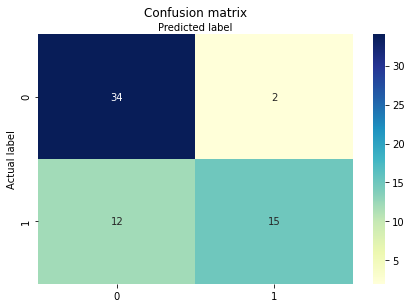

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7777777777777778
Precision: 0.8823529411764706
Recall: 0.5555555555555556


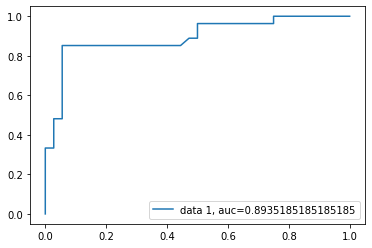

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.73333333 0.8        0.93333333 0.66666667 0.73333333 0.66666667
 0.85714286 0.5        0.64285714 0.64285714]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5, 0.7176190476190476, 0.9333333333333333)

The range of the accuracy is between 0.50 to 0.93 but generally 0.72 on average